In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r'E:\projects\py_tasks\heart disease\Heart Attack.csv')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


impluse ==> 

In [3]:
print(df.isnull().sum())
print(50*'*')
print(df.info())

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None


In [4]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,76.062168,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,15.350456,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,135.000000,223.000000,154.000000,541.000000,300.000000,10.300000


<Axes: xlabel='gender'>

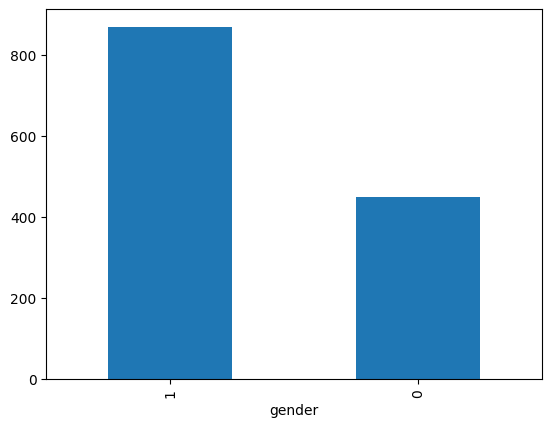

In [5]:
df['gender'].value_counts().plot(kind='bar')

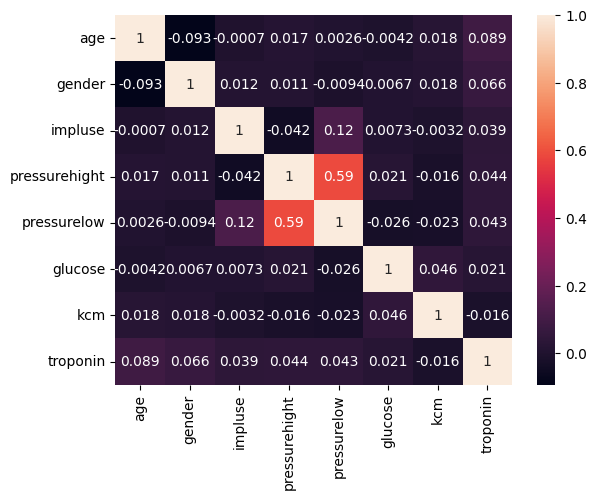

In [6]:
num_col = df.select_dtypes(include = [np.number])
correlation_mat = num_col.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

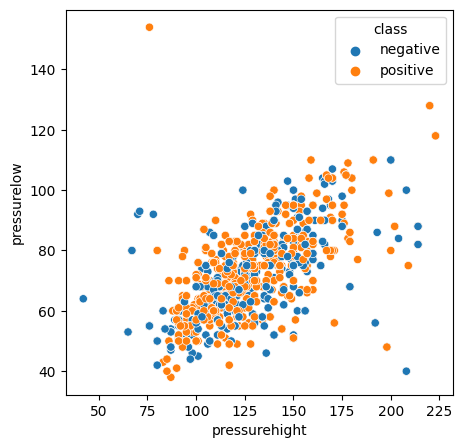

In [7]:
plt.figure(figsize = (5, 5))
sns.scatterplot(x = "pressurehight", y = "pressurelow", hue = "class", data = df)
plt.show()

<Axes: xlabel='age', ylabel='kcm'>

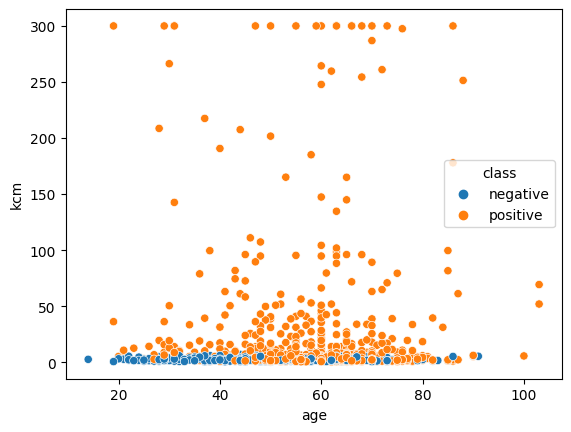

In [8]:
sns.scatterplot(x = "age", y = "kcm", hue = "class", data = df)

<Axes: xlabel='glucose', ylabel='kcm'>

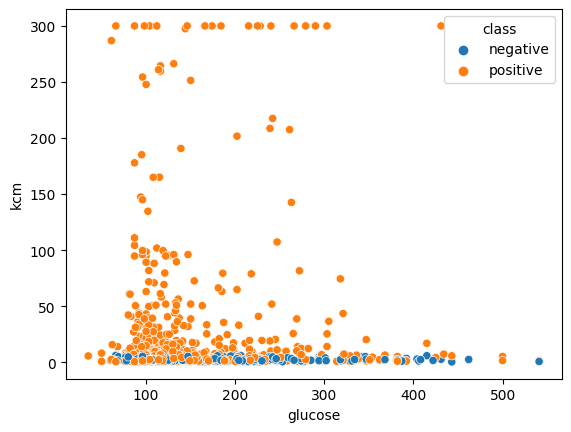

In [9]:
sns.scatterplot(x = "glucose", y = "kcm", hue = "class", data = df)

<Axes: xlabel='age', ylabel='impluse'>

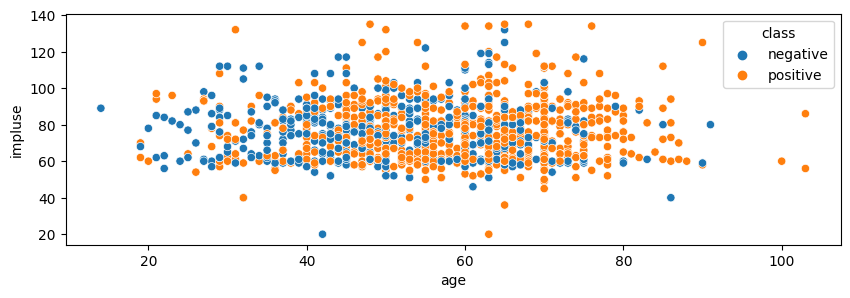

In [10]:
plt.figure(figsize = (10, 3))
sns.scatterplot(x = "age", y = "impluse",hue = "class", data = df)

<Axes: xlabel='age', ylabel='troponin'>

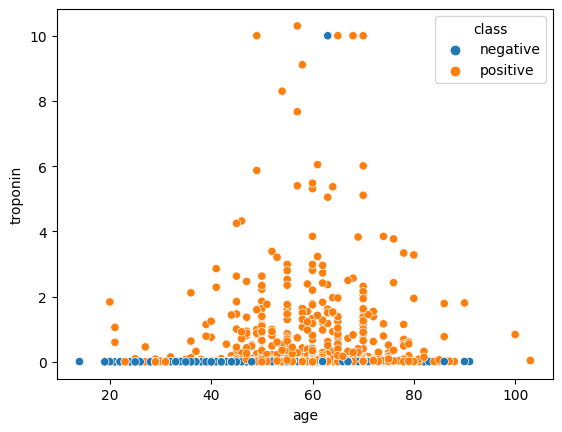

In [11]:
sns.scatterplot(x = "age", y = "troponin", hue = "class", data = df)

<Axes: xlabel='pressurehight', ylabel='pressurelow'>

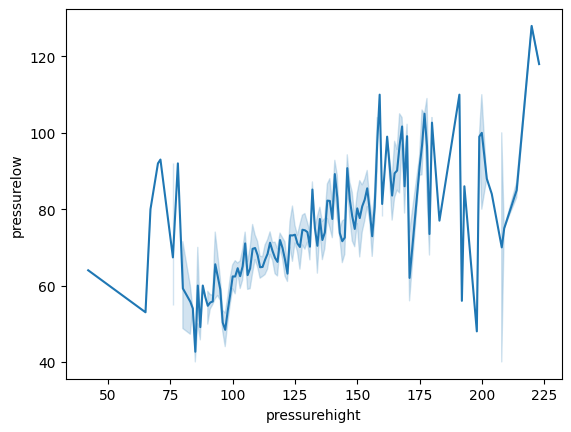

In [12]:
sns.lineplot(x = "pressurehight", y = "pressurelow", data = df)

In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [14]:
# KNN
print('KNN ile başarı')
for i in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  print('k = {0} için accuracy = {1}'.format(i, acc))

KNN ile başarı
k = 1 için accuracy = 0.603030303030303
k = 2 için accuracy = 0.5727272727272728
k = 3 için accuracy = 0.6090909090909091
k = 4 için accuracy = 0.5787878787878787
k = 5 için accuracy = 0.6303030303030303
k = 6 için accuracy = 0.5969696969696969
k = 7 için accuracy = 0.6272727272727273
k = 8 için accuracy = 0.6272727272727273
k = 9 için accuracy = 0.6515151515151515
k = 10 için accuracy = 0.6484848484848484


In [15]:
# RandomForestClassifier
for i in range(1,6):
  rfc = RandomForestClassifier(n_estimators=i, criterion='entropy')
  rfc.fit(x_train, y_train)
  y_pred = rfc.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  print('RandomForestClassifier = {0} için acc = {1}'.format(i, acc))


RandomForestClassifier = 1 için acc = 0.8878787878787879
RandomForestClassifier = 2 için acc = 0.9636363636363636
RandomForestClassifier = 3 için acc = 0.9818181818181818
RandomForestClassifier = 4 için acc = 0.9878787878787879
RandomForestClassifier = 5 için acc = 0.9878787878787879


In [31]:
# Get user input for each feature
age = float(input("Enter age: "))
gender = int(input("Enter gender (1 for male, 0 for female): "))
impluse = float(input("Enter impulsivity score: "))
pressurehight = float(input("Enter high blood pressure reading: "))
pressurelow = float(input("Enter low blood pressure reading: "))
glucose = float(input("Enter glucose level: "))
kcm = float(input("Enter KCM level: "))
troponin = float(input("Enter troponin level: "))

# Create a new data point
new_data = [[age, gender, impluse, pressurehight, pressurelow, glucose, kcm, troponin]]

# Predict the class for the new data point
rfc = RandomForestClassifier(n_estimators=5, criterion='entropy')
rfc.fit(x_train, y_train)
y_pred = rfc.predict(new_data)[0]

# Print prediction with corresponding accuracy
acc = accuracy_score(y_test, rfc.predict(x_test))
print(f'Predicted class: {y_pred}\n')


Predicted class: positive



c:\Users\mohammed zain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [32]:
def diagnosis():
    health=5
    if new_data [0][2] > 120 or new_data [0][2] < 60:
        print('''You are suffering from a pulse problem. I recommend the following instructions:
            - Regular exercise
            - Follow a healthy diet
            - Get enough sleep
            - Avoid caffeine and nicotine \n''')
        health-=1
    if new_data [0][3] > 120 or new_data [0][4] > 80:
        print('''You suffer from a problem with your blood pressure. I recommend the following instructions:
            - Use of medications
            - Reduce sodium intake
            - Stress control\n''')
        health-=1
    if new_data [0][5] > 180 or new_data [0][5] < 70:
        print('''You suffer from a problem with blood glucose levels. I recommend the following instructions:
            - Eat small, healthy meals throughout the day
            -Choose foods with a low glycemic index
            - Relax\n''')
        health-=1
    if new_data [0][6] > 5.5 or new_data [0][6] < 3.5:
        health-=1
    if new_data [0][7] > 0.4 :
        print('''You suffer from a problem with the troponin rate. I recommend the following instructions:
            - Go see the doctor
            - Drink plenty of fluids
            - Avoid fatty foods\n''')
        health-=1
    print(f'your health leve = {health}/5 \n')
    if health == 5 :
        print ('you are so powerful !')
if y_pred == 'positive' :
    print('you have a problem in your heart \n')
else:
    print('you are in a good health\n')
diagnosis()


you have a problem in your heart 

You are suffering from a pulse problem. I recommend the following instructions:
            - Regular exercise
            - Follow a healthy diet
            - Get enough sleep
            - Avoid caffeine and nicotine 

You suffer from a problem with the troponin rate. I recommend the following instructions:
            - Go see the doctor
            - Drink plenty of fluids
            - Avoid fatty foods

your health leve = 2/5 



In [18]:
# from sklearn.model_selection import train_test_split      #import this library to make train & test modeling for dataset
# from sklearn.linear_model import LogisticRegression         #to make evaluation for meding of dataset
# from sklearn.metrics import accuracy_score                #import this library to get values for accuracy
# import pandas as pd         #import libarary name is pandas to read my dataset and make fake name for library (pd)                              
# import numpy as np              #i import this library to make some algorithms process for dataset
# from sklearn.preprocessing import MinMaxScaler          #import this library to make some types for normalization scaling for dataset 
# from sklearn import preprocessing        #i import this library to make some processing for daatset
# from sklearn import svm                      #import this library to get values for accuracy of scaling dataset


# #loading dataset into pandas dataframe
# #make variable name is data_set and import library(pandas) to read the dataset
# data_set=pd.read_csv(r"C:\Users\mohammed zain\Desktop\HCV-Egy-Data.csv")
# print(data_set)       #make this order to print dataset
# print(data_set.shape)              #make this order to print all dataset
# # to print all coloumn's name for dataset
# print(data_set.head())
# #to know numbers of rows and columns (dimensions for datset)
# print(data_set.shape)
# print(data_set.dtypes)         #make this order to print type of data 

# #make this order to know if found empty cell will have value:true, and if not found empty cell will habve value:false, and sum all values:true
# print(data_set.isnull().sum()) 
# print("------------------------------------------------")


# # to know statistical measures of each column
# print(data_set.describe()) 
# print("-"*25)

# #this code to make encoding process for dataset
# d_types=data_set.dtypes        #make variable name is d-types and selected type for dataset by using function:dtypes
# for i in range (data_set.shape[1]):
#     if d_types[i]=='object':          #when type of dataset is object 
#         #make variabke name :pr_data and import module name:prprocessing, and import function name:labelencoder to make  encoding process for dataset
#         pr_data=preprocessing.LabelEncoder()  
#         data_set[data_set.columns[i]]=pr_data.fit_transform(data_set[data_set.columns[i]])
#         print("column index=',i")
#         print(pr_data.classes_)     
# print("-"*25)

# # Import necessary libraries
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Scaling the data
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(data_set)

# # Splitting the data into training and test sets
# x = data_set.iloc[:,:-1]
# y = data_set.iloc[:,-1]

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# # Train a model (replace this with your actual model)
# # Here, we are using Logistic Regression as an example
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(x_test, y_train)

# # Make predictions on the test set
# y_pred = model.predict(x_test)

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)

# # Print the accuracy
# print("Accuracy:", accuracy)

# # #for questions
# def diagnose_illness():
# #   """
# #   Asks the user questions about their symptoms and returns a boolean indicating whether the diagnosis is likely.
# #   """
#   age = int(input("Please enter your age: "))

#   diagnosis_likely = True

#   # Question 1: Age and diagnosis
#   if age <= 32:
#     has_diagnosis = input("Do you have a diagnosis? (y/n): ")
#     if has_diagnosis.lower() == "y":
#       diagnosis_likely = False
#   elif age > 32 and age <= 61:
#     has_diagnosis = input("Do you have a diagnosis? (y/n): ")
#     if has_diagnosis.lower() != "y":
#       diagnosis_likely = False

#   # Question 2: Fever
#   fever = input("Do you have a fever? (y/n): ")
#   if fever.lower() == "y":
#     diagnosis_likely = False

#   # Question 3: Nausea
#   nausea = input("Do you have nausea? (y/n): ")
#   if nausea.lower() == "y":
#     diagnosis_likely = False

#   # Question 4: Headache
#   headache = input("Do you have a headache? (y/n): ")
#   if headache.lower() == "y":
#     diagnosis_likely = False

#   return diagnosis_likely

# # Get user input and determine diagnosis
# diagnosis_likely = diagnose_illness()

# # Print the result
# if diagnosis_likely:
#   print("Based on your symptoms, a diagnosis is likely.")
# else:
#   print("Based on your symptoms, a diagnosis is not likely.")